[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/elcursodeia-code/blob/master/ml/01_intro.ipynb)

# Introducción al Machine Learning

Supongamos que queremos saber si el dinero da la felicidad. Primero, descargamos un conjunto de datos que contiene el PIB y la satisfacción con la vida de diferentes países.

In [1]:
!wget https://mymldatasets.s3.eu-de.cloud-object-storage.appdomain.cloud/country_stats.csv

--2024-09-12 16:22:05--  https://mymldatasets.s3.eu-de.cloud-object-storage.appdomain.cloud/country_stats.csv
Resolviendo mymldatasets.s3.eu-de.cloud-object-storage.appdomain.cloud (mymldatasets.s3.eu-de.cloud-object-storage.appdomain.cloud)... 158.177.118.97
Conectando con mymldatasets.s3.eu-de.cloud-object-storage.appdomain.cloud (mymldatasets.s3.eu-de.cloud-object-storage.appdomain.cloud)[158.177.118.97]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 784 [application/octet-stream]
Grabando a: «country_stats.csv»

country_stats.csv   100%[===================>]     784  --.-KB/s    en 0s      

2024-09-12 16:22:06 (249 MB/s) - «country_stats.csv» guardado [784/784]



Primero, exploramos los datos.


In [2]:
import pandas as pd

data = pd.read_csv('country_stats.csv', index_col="Country")
data

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


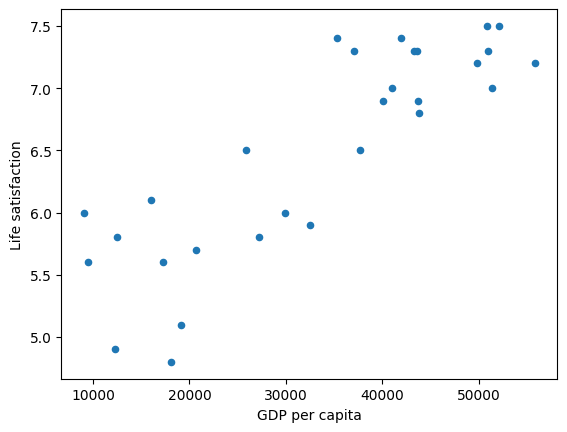

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline


data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

Podemos ver una tendencia en los datos, parece que la satisfacción con la vida aumenta con el PIB. Podemos intentar ajustar una línea para poder predecir la satisfacción con la vida de un país basándonos en su PIB.

\begin{equation}
  LS = w*GDP + b
\end{equation}

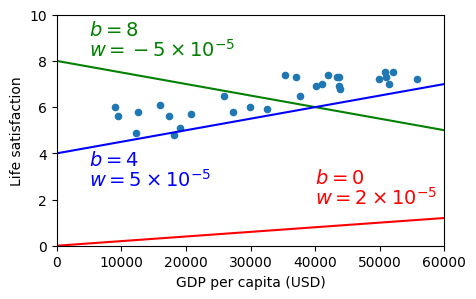

In [8]:
import numpy as np

data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, 2*X/100000, "r")
plt.text(40000, 2.7, r"$b = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$w = 2 \times 10^{-5}$", fontsize=14, color="r")
plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r"$b = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$w = -5 \times 10^{-5}$", fontsize=14, color="g")
plt.plot(X, 4 + 5*X/100000, "b")
plt.text(5000, 3.5, r"$b = 4$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$w = 5 \times 10^{-5}$", fontsize=14, color="b")
plt.show()

In [10]:
from sklearn import linear_model

lin1 = linear_model.LinearRegression()
Xsample = np.c_[data["GDP per capita"]]
ysample = np.c_[data["Life satisfaction"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(np.float64(4.853052800266436), np.float64(4.911544589158482e-05))

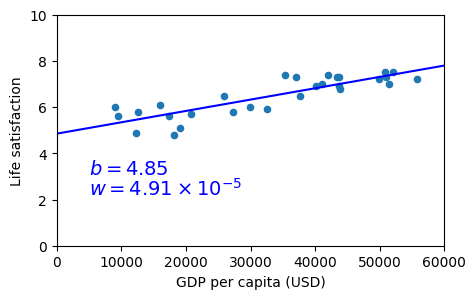

In [11]:
data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$b = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$w = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.show()

In [13]:
cyprus_gdp_per_capita = 22587
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])[0][0]
cyprus_predicted_life_satisfaction

np.float64(5.962423376619663)

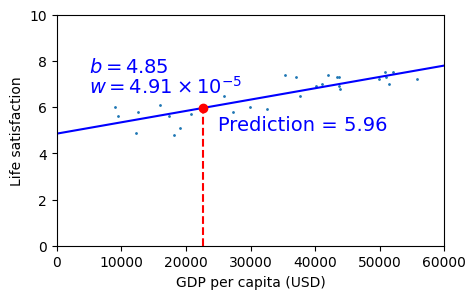

In [14]:
data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3), s=1)
plt.xlabel("GDP per capita (USD)")
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, r"$b = 4.85$", fontsize=14, color="b")
plt.text(5000, 6.6, r"$w = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], "r--")
plt.text(25000, 5.0, r"Prediction = 5.96", fontsize=14, color="b")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")
plt.show()

## Datos no representativos

Para generalizar bien, es crucial que los datos de entrenamiento sean representativos de los nuevos casos a los que se quiere generalizar.

In [15]:
!wget https://mymldatasets.s3.eu-de.cloud-object-storage.appdomain.cloud/missing_data.csv

--2024-09-12 16:25:44--  https://mymldatasets.s3.eu-de.cloud-object-storage.appdomain.cloud/missing_data.csv
Resolviendo mymldatasets.s3.eu-de.cloud-object-storage.appdomain.cloud (mymldatasets.s3.eu-de.cloud-object-storage.appdomain.cloud)... 158.177.118.97
Conectando con mymldatasets.s3.eu-de.cloud-object-storage.appdomain.cloud (mymldatasets.s3.eu-de.cloud-object-storage.appdomain.cloud)[158.177.118.97]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 210 [application/octet-stream]
Grabando a: «missing_data.csv»

missing_data.csv    100%[===================>]     210  --.-KB/s    en 0s      

2024-09-12 16:25:45 (66,8 MB/s) - «missing_data.csv» guardado [210/210]



In [16]:
missing_data = pd.read_csv('missing_data.csv', index_col="Country")
missing_data

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


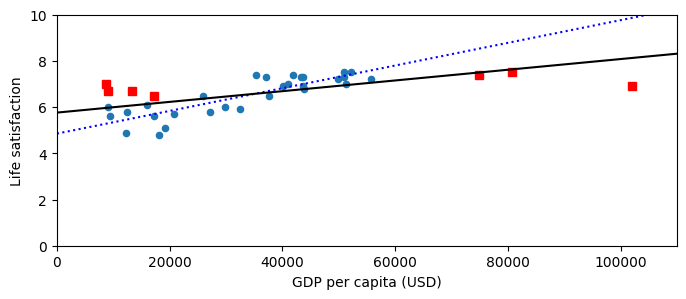

In [17]:
data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

for country in missing_data.iterrows():
    plt.plot(country[1]["GDP per capita"], country[1]["Life satisfaction"], "rs")

X=np.linspace(0, 110000, 1000)
plt.plot(X, t0 + t1*X, "b:")

lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[np.r_[data["GDP per capita"],missing_data["GDP per capita"]]]
yfull = np.c_[np.r_[data["Life satisfaction"],missing_data["Life satisfaction"]]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "k")
plt.xlabel("GDP per capita (USD)")

plt.show()

## *Overfitting*

El sobreajuste (overfitting) ocurre cuando el modelo es demasiado complejo para representar la distribución real de los datos. Los datos de entrenamiento se ajustan muy bien, pero luego el modelo es incapaz de generalizar a otros datos no utilizados durante el entrenamiento. Es uno de los problemas más comunes al entrenar modelos de aprendizaje automático, y se puede reducir utilizando modelos más simples, recopilando más datos o reduciendo el ruido en los datos de entrenamiento.

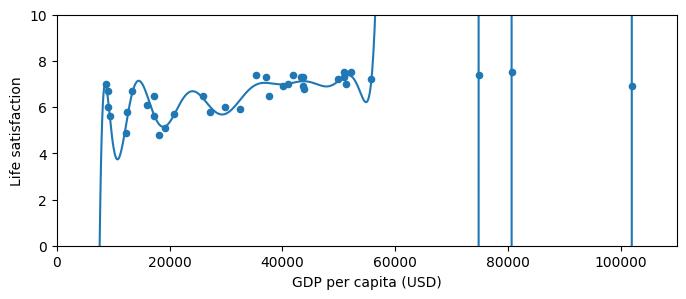

In [18]:
full_data = pd.concat([data, missing_data])

full_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

from sklearn import preprocessing
from sklearn import pipeline

poly = preprocessing.PolynomialFeatures(degree=20, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)
plt.xlabel("GDP per capita (USD)")
plt.show()